In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# <mark> <font color="blue">Uploading Datasets</font> </mark>

In [2]:
h_details = pd.read_csv("Hospitalisation details.csv")
med_exam = pd.read_csv("Medical Examinations.csv")
names_df = pd.read_excel("Names.xlsx")

In [3]:
h_details.head()

Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID  
0    R1013  
1    R1013  
2    R1013  
3    R1013  
4    R1013

In [4]:
h_details.shape

(2343, 9)

In [5]:
med_exam.head()

Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   
3         Id4  38.095   6.05           No              No             No   
4         Id5  35.530   5.45           No              No             No   

  NumberOfMajorSurgeries smoker  
0       No major surgery    yes  
1       No major surgery    yes  
2                      2    yes  
3       No major surgery    yes  
4       No major surgery    yes

In [6]:
med_exam.shape

(2335, 8)

In [7]:
names_df.head()

Customer ID                    name
0         Id1       Hawks, Ms.  Kelly
1         Id2  Lehner, Mr.  Matthew D
2         Id3           Lu, Mr.  Phil
3         Id4    Osborne, Ms.  Kelsey
4         Id5    Kadala, Ms.  Kristyn

In [8]:
names_df.shape

(2335, 2)

# <mark><font color="blue"> Collating Datsets</font></mark>

In [9]:
main_df = h_details.merge(med_exam,on='Customer ID').merge(names_df,on='Customer ID')

In [10]:
main_df.shape

(2335, 17)

In [11]:
main_df.head()

Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID    BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1013  17.58   4.51           No              No             No   
1    R1013  17.60   4.39           No              No             No   
2    R1013  16.47   6.35           No              No            Yes   
3    R1013  17.70   6.28           No              No             No   
4    R1013  22.34   5.57           No              No             No   

  NumberOfMajorSurgeries smoker                                name  
0                      1     No                German, Mr.  Aaron K  
1                      1     No              Rosendahl, Mr.  Evan P  
2                      1     No                  Albano, Ms.  Julie  
3                      1     No  Riveros Gonzalez, Mr.  Juan D. Sr.  
4                      1     No               Brietzke, Mr.  Jordan

# <mark><font color="blue"> Checking for trivial values , null values and duplicated values in data</font>

In [12]:
if ((main_df == '?') | (main_df == '!')).values.any() or main_df.isnull().values.any():
    print(f"There are {(((main_df=='?').sum(axis=1))>0).sum(axis=0)} rows having '?' and {(main_df=='!').sum(axis=1).sum(axis=0)} rows having '!'.")
    print(f"There are {main_df.isnull().sum().sum()} rows having null values.")
    print(f"There are {main_df.notnull().sum().sum()} not null values and {(main_df!='?').sum(axis=1).sum(axis=0) + (main_df!='!').sum(axis=1).sum(axis=0)} rows without '?' and '! values." )

There are 10 rows having '?' and 0 rows having '!'.
There are 0 rows having null values.
There are 39695 not null values and 79379 rows without '?' and '! values.


- ## We do not have null values in our dataset

In [13]:
trivial_columns = (main_df=='?').sum(axis=0)
trivial_columns

Customer ID               0
year                      2
month                     3
date                      0
children                  0
charges                   0
Hospital tier             1
City tier                 1
State ID                  2
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    2
name                      0
dtype: int64

In [14]:
main_df.loc[(main_df['year']=='?')|(main_df['month']=='?')|(main_df['City tier']=='?')|(main_df['Hospital tier']=='?')|(main_df['State ID']=='?')|(main_df['smoker']=='?')]

Customer ID  year month  date  children   charges Hospital tier  \
11        Id2324  1999   Dec    26         0    700.00             ?   
13        Id2322  2002     ?    19         0    750.00      tier - 3   
17        Id2318  1996     ?    18         0    770.38      tier - 3   
542       Id1793  1995   Dec     1         3   4827.90      tier - 1   
1046      Id1289     ?   Jul    24         0   8534.67      tier - 2   
1049      Id1286     ?   Dec    12         1   8547.69      tier - 2   
1700       Id635  2004   Jul    17         0  15518.18      tier - 2   
1775       Id560  1994   Jul     1         3  17663.14      tier - 1   
2165       Id170  2000   Sep     5         1  37165.16      tier - 1   
2332         Id3  1970     ?    11         3  60021.40      tier - 1   

     City tier State ID     BMI  HBA1C Heart Issues Any Transplants  \
11    tier - 3    R1013  22.240   5.04           No              No   
13    tier - 1    R1012  21.380   8.01           No              No   
17           ?    R1012  18.820   5.51          yes              No   
542   tier - 2        ?  18.905   4.91          yes              No   
1046  tier - 3    R1024  24.320  11.56          yes              No   
1049  tier - 1    R1013  29.370   8.01          yes              No   
1700  tier - 3    R1015  25.175   4.96           No             yes   
1775  tier - 3    R1013  23.980   4.90           No              No   
2165  tier - 3        ?  37.620   6.32          yes             yes   
2332  tier - 1    R1012  34.485  11.87          yes              No   

     Cancer history NumberOfMajorSurgeries smoker                    name  
11               No       No major surgery     No    Duffy, Ms.  Meghan K  
13               No       No major surgery     No      Street, Ms.  Holly  
17               No       No major surgery     No  Gagnon, Ms.  Candice M  
542              No                      1     No  Capriolo, Mr.  Michael  
1046             No                      1     No   Levine, Ms.  Annie J.  
1049             No                      1     No  Ainsley, Ms.  Katie M.  
1700             No                      1      ?   Bruns, Mr.  Zachary T  
1775             No       No major surgery      ?       Pearlman, Mr.  Oz  
2165             No                      2    yes      Torphy, Mr.  Bobby  
2332             No                      2    yes           Lu, Mr.  Phil

In [15]:
# Remove the trivial rows
main_df = main_df[(main_df!= '?').all(axis=1)]

In [16]:
main_df.shape

(2325, 17)

# <mark> <font color='Blue'> Data Description & EDA</font></mark>

In [17]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   object 
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   object 
 7   City tier               2325 non-null   object 
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   object 
 12  Any Transplants         2325 non-null   object 
 13  Cancer history          2325 non-null   object 
 14  NumberOfMajorSurgeries  2325 non-null   

In [18]:
main_df.describe(include='object').T

count unique                   top  freq
Customer ID             2325   2325                Id2335     1
year                    2325     47                  2004    97
month                   2325      7                   Sep   368
Hospital tier           2325      3              tier - 2  1334
City tier               2325      3              tier - 2   807
State ID                2325     16                 R1013   609
Heart Issues            2325      2                    No  1405
Any Transplants         2325      2                    No  2183
Cancer history          2325      2                    No  1934
NumberOfMajorSurgeries  2325      4      No major surgery  1070
smoker                  2325      2                    No  1839
name                    2325   2325  German, Mr.  Aaron K     1

In [19]:
main_df.describe(include='float')

charges          BMI        HBA1C
count   2325.000000  2325.000000  2325.000000
mean   13521.660254    30.995630     6.576718
std    11863.492697     8.744938     2.226892
min      563.840000    15.010000     4.000000
25%     5116.500000    24.605000     4.900000
50%     9634.540000    30.400000     5.810000
75%    16903.500000    36.300000     7.950000
max    63770.430000    55.050000    12.000000

In [20]:
main_df.describe(include='int')

date     children
count  2325.000000  2325.000000
mean     15.572903     1.025376
std       8.720287     1.234456
min       1.000000     0.000000
25%       8.000000     0.000000
50%      15.000000     0.000000
75%      23.000000     2.000000
max      30.000000     5.000000

- ## <font color ='Red'> Ordinal Columns</font>:
###     Hospital tier, City tier, children, year, month, number of major surgeries, date
- ## <font color ='Red'> Nomilnal Columns</font>:
###     Customer ID, name, State ID
- ## <font color ='Red'> Binary Columns</font>:
###     Heart Issues, Any Transplants, Cancer history, smoker

In [21]:
main_df['NumberOfMajorSurgeries'].unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [22]:
# Replacing 'No major surgery' with 0
main_df['NumberOfMajorSurgeries'].replace({'No major surgery':'0'},inplace=True)
main_df['NumberOfMajorSurgeries'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [23]:
main_df['NumberOfMajorSurgeries'] = pd.to_numeric(main_df['NumberOfMajorSurgeries'])
main_df['NumberOfMajorSurgeries'].dtype

dtype('int64')

In [24]:
main_df['month'].unique()

array(['Jul', 'Nov', 'Jun', 'Sep', 'Dec', 'Aug', 'Oct'], dtype=object)

In [25]:
main_df['year'].unique()

array(['1992', '1993', '1998', '2001', '1995', '2002', '1997', '1999',
       '1996', '2004', '2000', '1994', '2003', '1989', '1991', '1988',
       '1990', '1987', '1986', '1981', '1985', '1984', '1983', '1982',
       '1980', '1979', '1977', '1978', '1974', '1973', '1972', '1975',
       '1971', '1970', '1969', '1976', '1968', '1966', '1965', '1967',
       '1962', '1963', '1964', '1961', '1960', '1959', '1958'],
      dtype=object)

In [26]:
main_df['Hospital tier'].unique()

array(['tier - 2', 'tier - 3', 'tier - 1'], dtype=object)

In [27]:
main_df['City tier'].unique()

array(['tier - 3', 'tier - 1', 'tier - 2'], dtype=object)

In [28]:
main_df['children'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [29]:
main_df['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1015', 'R1019', 'R1016', 'R1018',
       'R1025', 'R1024', 'R1023', 'R1014', 'R1021', 'R1017', 'R1020',
       'R1026', 'R1022'], dtype=object)

Text(0.5, 1.0, 'Count of State ID catgeories')

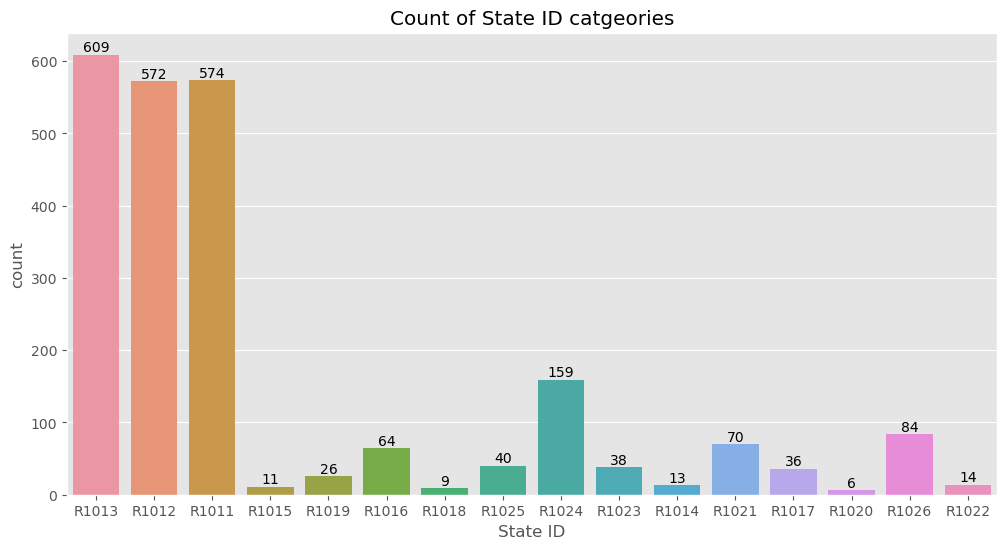

In [30]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data= main_df,x='State ID')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Count of State ID catgeories")

### The dataset has State ID, which has around 16 states.
### All states are not represented in equal proportions in the data. 
### Creating dummy variables for all regions may also result in too many insignificant predictors. 
### Nevertheless, only R1011, R1012, and R1013 are worth investigating further.

In [31]:
main_df.rename(columns={'date':'day'},inplace=True)

In [32]:
month_maping = {'Jun':6,
               'Jul':7,
               'Aug':8,
               'Sep':9,
               'Oct':10,
               'Nov':11,
               'Dec':12}
main_df['month'] = main_df['month'].map(month_maping)

In [33]:
main_df['birthdate'] = pd.to_datetime(main_df[['year','month','day']])

In [34]:
main_df['birthdate']

0      1992-07-09
1      1992-11-30
2      1993-06-30
3      1992-09-13
4      1998-07-27
          ...    
2329   1962-08-04
2330   1989-06-19
2331   1991-06-06
2333   1977-06-08
2334   1968-10-12
Name: birthdate, Length: 2325, dtype: datetime64[ns]

In [35]:
today = pd.to_datetime('today')

In [36]:
main_df['Age'] = (today - main_df['birthdate']).astype('timedelta64[Y]')

In [37]:
main_df['Age']

0       30.0
1       30.0
2       29.0
3       30.0
4       24.0
        ... 
2329    60.0
2330    33.0
2331    31.0
2333    45.0
2334    54.0
Name: Age, Length: 2325, dtype: float64

In [38]:
main_df['name']

0                     German, Mr.  Aaron K
1                   Rosendahl, Mr.  Evan P
2                       Albano, Ms.  Julie
3       Riveros Gonzalez, Mr.  Juan D. Sr.
4                    Brietzke, Mr.  Jordan
                       ...                
2329                Baker, Mr.  Russell B.
2330                  Kadala, Ms.  Kristyn
2331                  Osborne, Ms.  Kelsey
2333                Lehner, Mr.  Matthew D
2334                     Hawks, Ms.  Kelly
Name: name, Length: 2325, dtype: object

In [39]:
main_df['name'].str.extract(r'(\w+\.)').squeeze().unique()

array(['Mr.', 'Ms.', 'Mrs.'], dtype=object)

In [40]:
salutation_mapping = {
    'Mr.': 'Male',
    'Mrs.': 'Female',
    'Ms.': 'Female'}

In [41]:
main_df['gender'] = main_df['name'].str.extract(r'(\w+\.)').squeeze().map(salutation_mapping)

In [42]:
main_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

## <mark><font color = 'blue'> Distribution of cost (charges):</font></mark>

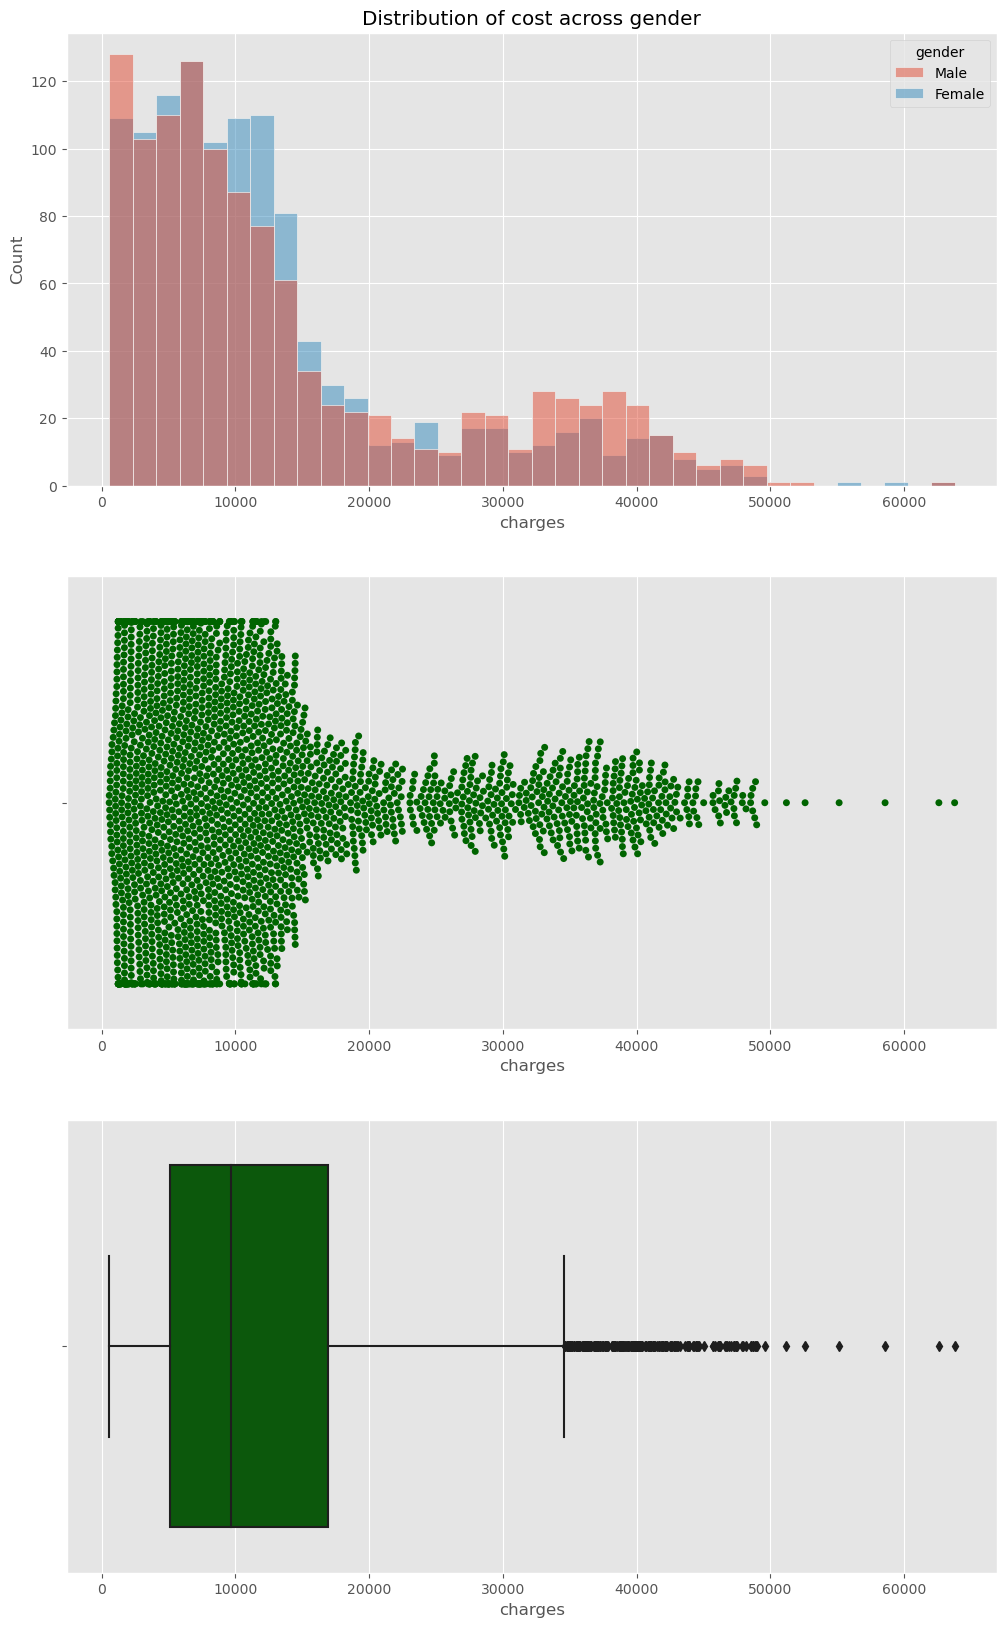

In [43]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(12,20))
ax[0] = sns.histplot(data =main_df,x='charges',ax= ax[0],color='darkgreen',hue='gender')
ax[0].set_title("Distribution of cost across gender")
ax[1] = sns.swarmplot(data =main_df,x='charges',ax= ax[1],color='darkgreen',hue='gender')
ax[2] = sns.boxplot(data=main_df,x= 'charges',ax= ax[2],color='darkgreen',hue='gender')

[Text(0, 0, '14236.7'), Text(0, 0, '12809.7')]

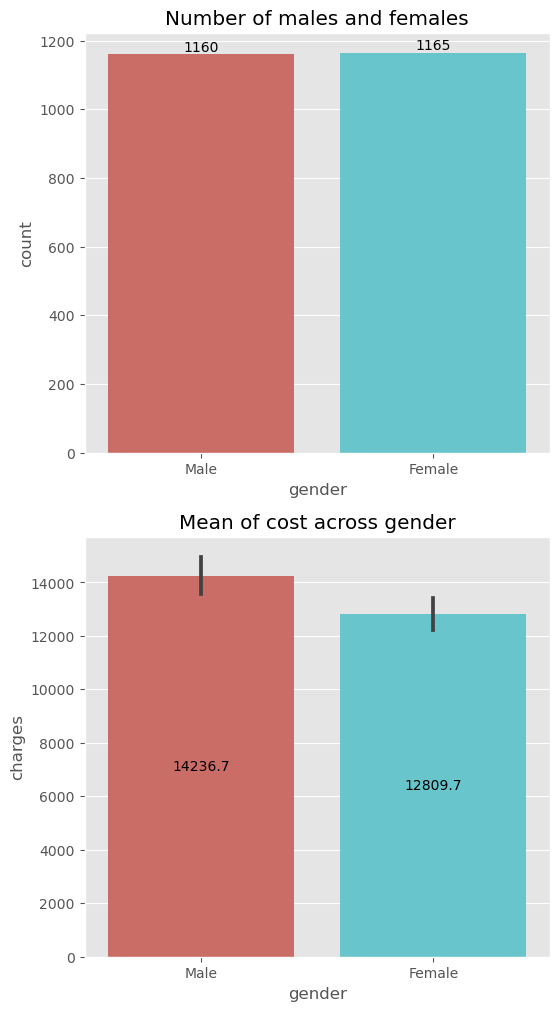

In [44]:
fig,ax = plt.subplots(nrows=2,figsize=(6,12))
ax[0] = sns.countplot(data=main_df,x='gender',ax=ax[0],palette="hls")
ax[0].set_title("Number of males and females")
for container in ax[0].containers:
    ax[0].bar_label(container)

ax[1] = sns.barplot(data=main_df,x='gender',y='charges',ax=ax[1],palette="hls")
ax[1].set_title('Mean of cost across gender')
plt.bar_label(ax[1].containers[0],label_type='center')

[Text(0, 0, '11875.9'), Text(0, 0, '9487.46'), Text(0, 0, '30132')]

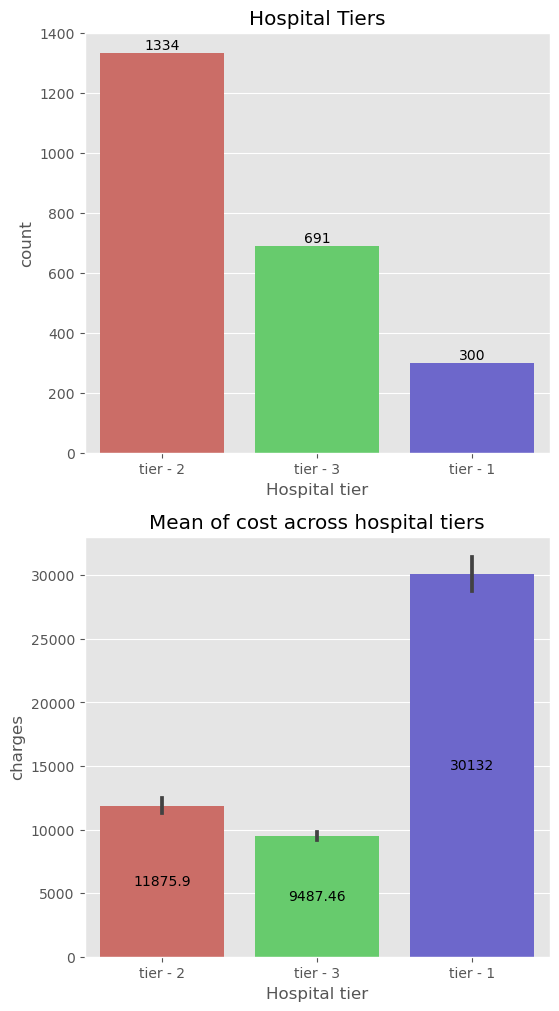

In [45]:
fig,ax = plt.subplots(nrows=2,figsize=(6,12))
ax[0] = sns.countplot(data=main_df,x='Hospital tier',ax=ax[0],palette="hls")
ax[0].set_title("Hospital Tiers")
for container in ax[0].containers:
    ax[0].bar_label(container)

ax[1] = sns.barplot(data=main_df,x='Hospital tier',y='charges',ax=ax[1],palette="hls")
ax[1].set_title('Mean of cost across hospital tiers')
plt.bar_label(ax[1].containers[0],label_type='center')

Text(0.5, 1.0, 'Distribuiton of cost for differnt hospital tiers')

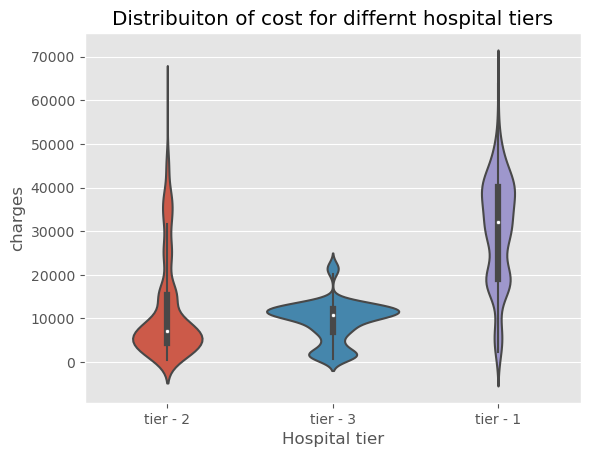

In [46]:
sns.violinplot(data=main_df,x='Hospital tier',y='charges')
plt.title('Distribuiton of cost for differnt hospital tiers')

In [47]:
Median_Hospitalization_Cost = main_df.groupby('Hospital tier')['charges'].mean()
Hospital_tier = ['tier - 1','tier - 2','tier - 3']

In [48]:
Median_Hospitalization_Cost

Hospital tier
tier - 1    30131.995900
tier - 2    11875.883861
tier - 3     9487.456223
Name: charges, dtype: float64

In [49]:
Hospital_tier

['tier - 1', 'tier - 2', 'tier - 3']

In [50]:
df = pd.DataFrame({
    'Hospital Tier':Hospital_tier,
    'Median Hospitalization Cost':Median_Hospitalization_Cost
})

In [51]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=df['Median Hospitalization Cost'],
      theta=df['Hospital Tier'],
      fill='toself',
      name='Median Hospitalization Cost'
))
# Add text annotations for the median values
fig.add_trace(go.Scatterpolar(
      r=df['Median Hospitalization Cost'],
      theta=df['Hospital Tier'].unique(),
      text=round(df['Median Hospitalization Cost'],1),
      mode='text',
      hoverinfo='none'
))

# Set the title of the chart and axis properties
fig.update_layout(
    title='Median Hospitalization Cost by Tier of Hospital',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df['Median Hospitalization Cost'])],
            tickfont=dict(size=14),
            ticksuffix='$'
        ),
        angularaxis=dict(
            visible=True,
            tickfont=dict(size=14),
            rotation=270
        )
    ),template='plotly_dark'
)

# Display the chart
fig.show()

In [52]:
freq_table = pd.crosstab(main_df['Hospital tier'], [main_df['City tier']], rownames=['Hospital Tier'], colnames=['City Tier'])
freq_table

City Tier      tier - 1  tier - 2  tier - 3
Hospital Tier                              
tier - 1             85       106       109
tier - 2            403       479       452
tier - 3            241       222       228

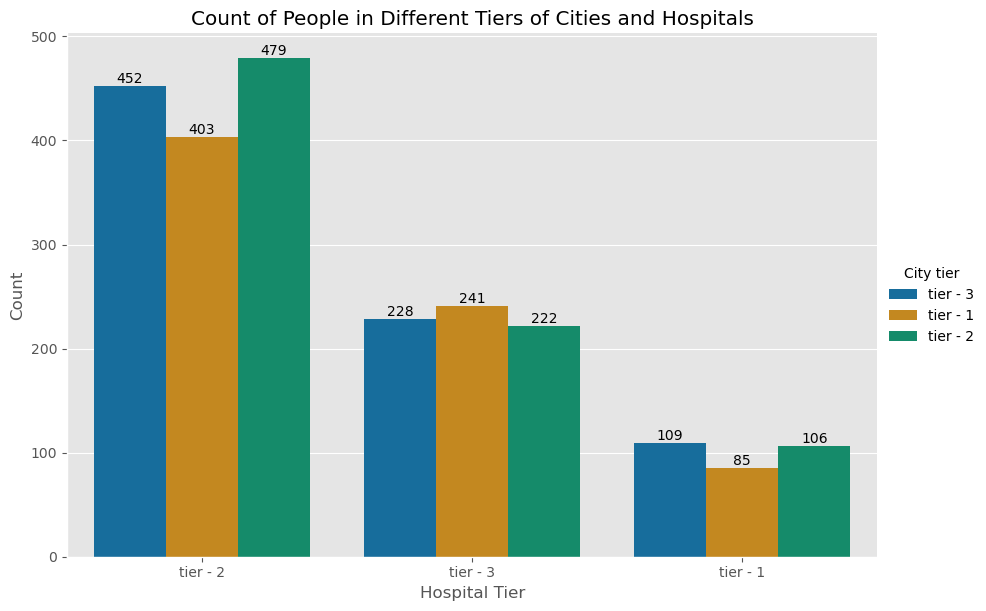

In [53]:
ax = sns.catplot(x='Hospital tier', hue='City tier', kind='count', data=main_df, height=6, aspect=1.5,palette='colorblind')
plt.xlabel('Hospital Tier')
plt.ylabel('Count')
plt.title('Count of People in Different Tiers of Cities and Hospitals')
for container in ax.ax.containers:
    ax.ax.bar_label(container)

In [54]:
from scipy.stats import f_oneway, ttest_ind,chi2_contingency

In [55]:
# One-way ANOVA for hospital tiers
f_stat, p_value = f_oneway(main_df[main_df['Hospital tier'] == 'tier - 1']['charges'],
                           main_df[main_df['Hospital tier'] == 'tier - 2']['charges'],
                           main_df[main_df['Hospital tier'] == 'tier - 3']['charges'])
print(f"p-value for hospital tiers ANOVA: {p_value:.179f}")

p-value for hospital tiers ANOVA: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002


In [56]:
# One-way ANOVA for city tiers
f_stat, p_value = f_oneway(main_df[main_df['City tier'] == 'tier - 1']['charges'],
                           main_df[main_df['City tier'] == 'tier - 2']['charges'],
                           main_df[main_df['City tier'] == 'tier - 3']['charges'])
print(f"p-value for hospital tiers ANOVA: {p_value:.4f}")

p-value for hospital tiers ANOVA: 0.2338


In [57]:
# Two-sample t-test for smokers vs non-smokers
smoker_costs = main_df[main_df['smoker'] == 'yes']['charges']
non_smoker_costs = main_df[main_df['smoker'] == 'No']['charges']
t_stat, p_value = ttest_ind(smoker_costs, non_smoker_costs, equal_var=False)
print(f"p-value for smoker vs non-smoker t-test: {p_value:.250f}")

p-value for smoker vs non-smoker t-test: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000006697431845034


In [58]:
# Chi-squared test of independence for smoking and heart issues
smoking_heart = pd.crosstab(main_df['smoker'], main_df['Heart Issues'])
chi2_stat, p_value, dof, expected = chi2_contingency(smoking_heart)
print(f"p-value for smoking and heart issues chi-squared test: {p_value:.4f}")

p-value for smoking and heart issues chi-squared test: 0.7695


Text(0.5, 1.0, 'Average cost across non-smoker and smoker')

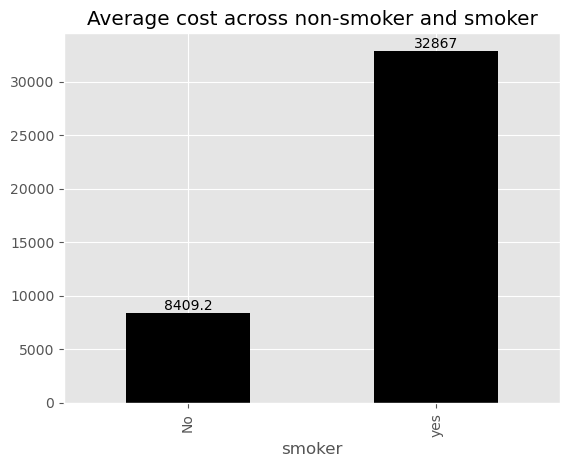

In [59]:
ax = main_df.groupby('smoker')['charges'].mean().plot(kind='bar',color='black')
plt.bar_label(ax.containers[0],label_type='edge')
plt.title('Average cost across non-smoker and smoker')

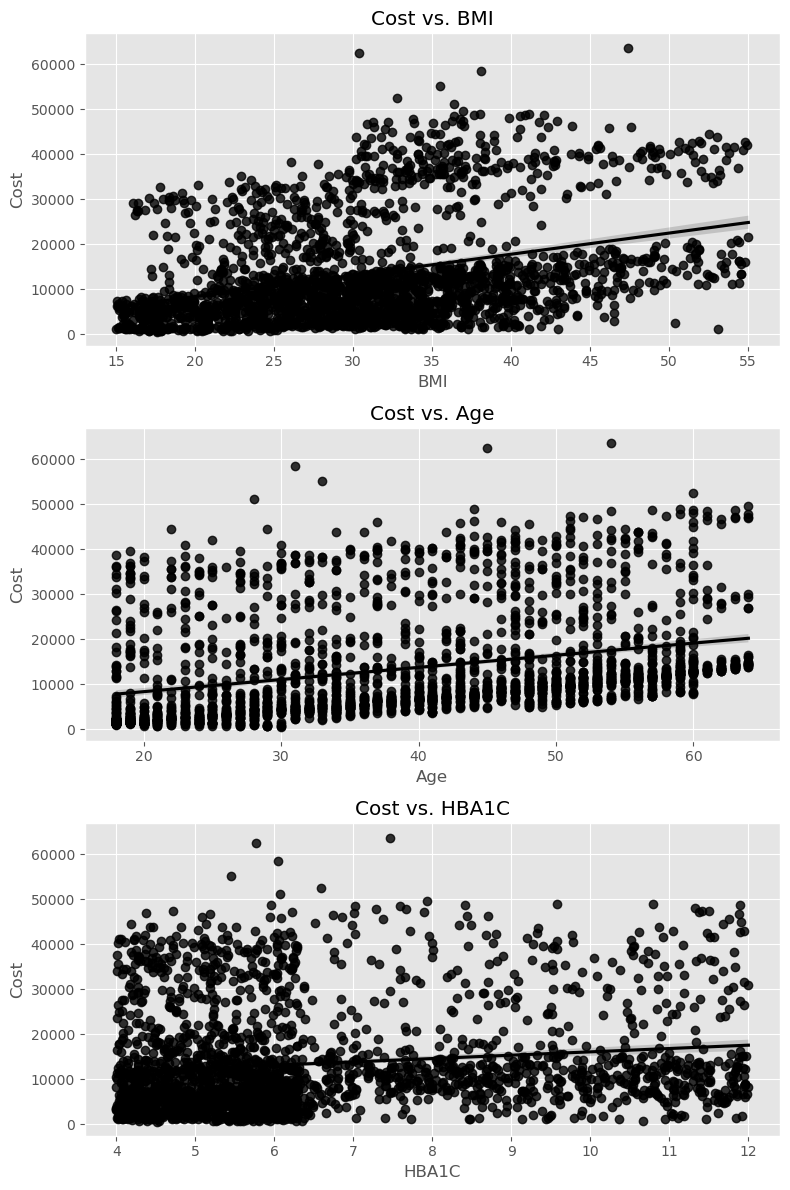

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Defining the column names to plot against 'cost'
columns = ['BMI', 'Age', 'HBA1C']

# Using a for loop to create a scatterplot for each column
for i, column in enumerate(columns):
    sns.regplot(data=main_df, x=column, y='charges', ax=axes[i],color='black')
    axes[i].set_title(f'Cost vs. {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Cost')

plt.tight_layout()
plt.show()

<AxesSubplot:>

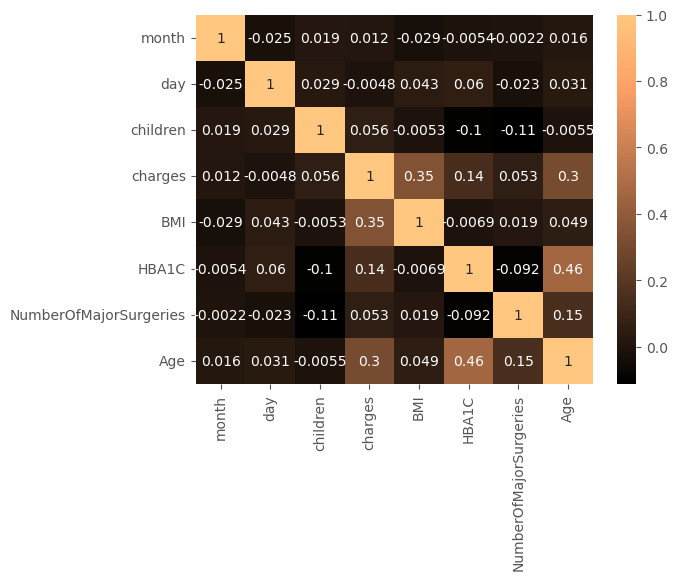

In [61]:
corr = main_df.corr()
sns.heatmap(corr,annot=True,cmap='copper')

In [62]:
main_df.to_csv('Health_Cost_main.csv',index=False)